# **Frecuencia de un Bus**

In [ ]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
if os.access('frecuencia_colectivo.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/into_analytics_python/main/frecuencia_colectivo.csv > frecuencia_colectivo.csv
    else:
        !wget frecuencia_colectivo.csv https://raw.githubusercontent.com/InoveAlumnos/into_analytics_python/main/frecuencia_colectivo.csv

--2022-02-06 20:33:23--  http://frecuencia_colectivo.csv/
Resolving frecuencia_colectivo.csv (frecuencia_colectivo.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘frecuencia_colectivo.csv’
--2022-02-06 20:33:23--  https://raw.githubusercontent.com/InoveAlumnos/into_analytics_python/main/frecuencia_colectivo.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1534 (1.5K) [text/plain]
Saving to: ‘frecuencia_colectivo.csv’

frecuencia_colectiv 100%[===================>]   1.50K  --.-KB/s    in 0s      

2022-02-06 20:33:23 (23.8 MB/s) - ‘frecuencia_colectivo.csv’ saved [1534/1534]

FINISHED --2022-02-06 20:33:23--
Total wall clock time: 0.2s
Downloaded: 1 files, 1.5K in 0s (23.8 MB/s)


In [ ]:
df = pd.read_csv('frecuencia_colectivo.csv')
df['Lunes'] = pd.to_datetime(df['Lunes'])
#print(df['Lunes'])  #Retorna  2022-02-06 04:00:00
lunes = df['Lunes'].diff()[1:].dt.seconds / 60
#print(lunes) #Retorna 12.0, convierte todo en seg


In [ ]:
def get_bus_data(file_name):
    
    df = pd.read_csv(file_name)
    df['Lunes'] = pd.to_datetime(df['Lunes'])
    df['Martes'] = pd.to_datetime(df['Martes'])
    df['Miercoles'] = pd.to_datetime(df['Miercoles'])
    df['Jueves'] = pd.to_datetime(df['Jueves'])
    df['Viernes'] = pd.to_datetime(df['Viernes'])
    df['Sabado'] = pd.to_datetime(df['Sabado'])
    
    lunes = df['Lunes'].diff()[1:].dt.seconds / 60
    martes = df['Martes'].diff()[1:].dt.seconds / 60
    miercoles = df['Miercoles'].diff()[1:].dt.seconds / 60
    jueves = df['Jueves'].diff()[1:].dt.seconds / 60
    viernes = df['Viernes'].diff()[1:].dt.seconds / 60
    sabado = df['Sabado'].diff()[1:].dt.seconds / 60
    
    return lunes, martes, miercoles, jueves, viernes, sabado

In [ ]:
lunes, martes, miercoles, jueves, viernes, sabado = get_bus_data('frecuencia_colectivo.csv')
print("Datos recolectados los lunes:", len(lunes))


Datos recolectados los lunes: 43


Datos ensayados: 215
Promedio: 15.083720930232559
Mediana: 15.0
Desvio: 3.584522947245473


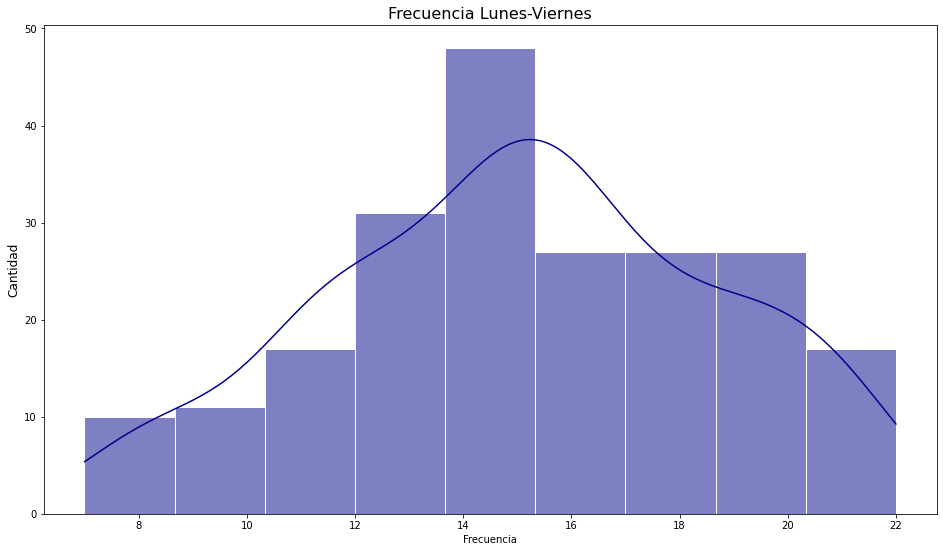

In [ ]:
#Unión de los datos de los segundos de la semana
frecuencia = np.append(lunes, martes)
frecuencia = np.append(frecuencia, miercoles)
frecuencia = np.append(frecuencia, jueves)
frecuencia = np.append(frecuencia, viernes)

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
    
sns.set_style("white")
        
ax = sns.histplot(x=frecuencia, kde=True, color="darkBlue", ax=ax)
ax.set_title("Frecuencia Lunes-Viernes", fontsize=16)
ax.set_ylabel("Cantidad", fontsize=12)
ax.set_xlabel('Frecuencia')

print("Datos ensayados:", len(frecuencia))
print("Promedio:", np.mean(frecuencia))
print("Mediana:", np.median(frecuencia))
print("Desvio:", np.std(frecuencia))
plt.show()

La frecuencia de lunes a viernes tiene un promedio de 15,08 aproximadamente y una media de 15.0, presentando un desvio estándar bajo, lo que significa que los valores se encuentran agrupados cerca de la media.

En resumen, el colectivo se tarda en pasar en la semana entre 13 min a 18 min de espera.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Datos ensayados: 215
Promedio: 15.083720930232559
Mediana: 15.0
Desvio: 3.584522947245473


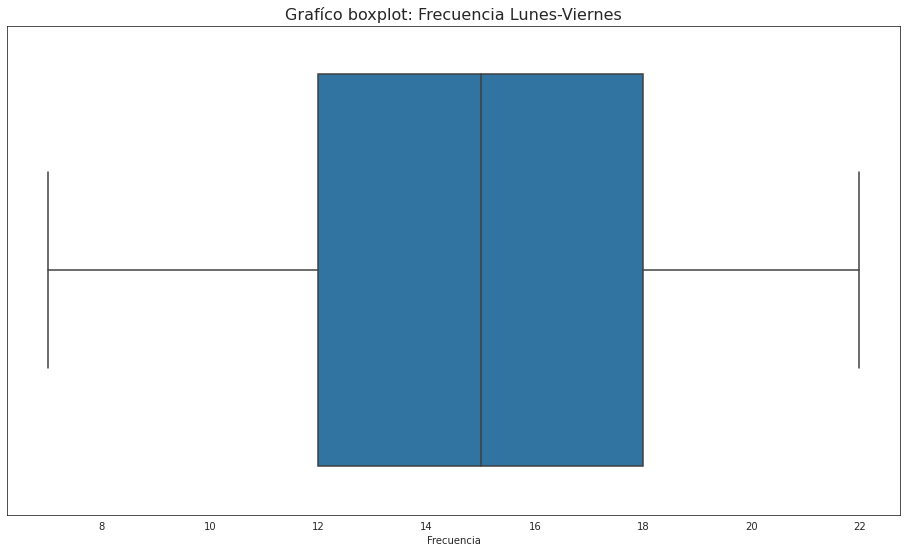

In [ ]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
ax = sns.boxplot(frecuencia, ax=ax)
ax.set_title("Grafíco boxplot: Frecuencia Lunes-Viernes", fontsize=16)
ax.set_xlabel('Frecuencia')

print("Datos ensayados:", len(frecuencia))
print("Promedio:", np.mean(frecuencia))
print("Mediana:", np.median(frecuencia))
print("Desvio:", np.std(frecuencia))
plt.show()

# Frecuencia lunes-sábados


Datos ensayados: 258
Promedio: 17.143410852713178
Mediana: 16.0
Desvio: 5.957112158194486


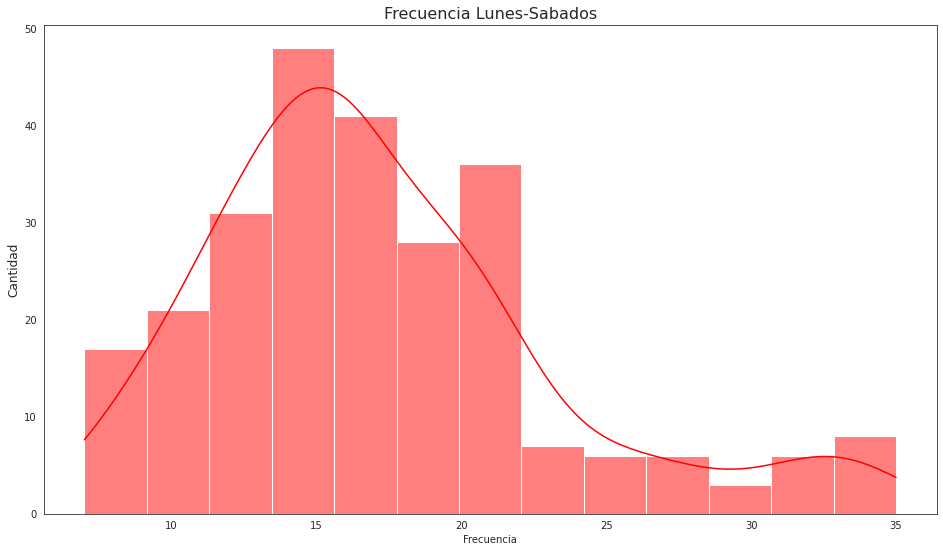

In [ ]:
frecuencia2 = np.append(frecuencia, sabado)

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
    
sns.set_style("white")
        
ax = sns.histplot(x=frecuencia2, kde=True, color="red", ax=ax)
ax.set_title("Frecuencia Lunes-Sabados", fontsize=16)
ax.set_ylabel("Cantidad", fontsize=12)
ax.set_xlabel('Frecuencia')

print("Datos ensayados:", len(frecuencia2))
print("Promedio:", np.mean(frecuencia2))
print("Mediana:", np.median(frecuencia2))
print("Desvio:", np.std(frecuencia2))
plt.show()

La frecuencia de lunes a sábado tiene un promedio de 17,14 aproximadamente y una media de 16.0, presentando un desvio estándar bajo pero aumentado en más de dos puntos en comparación con el desvio de lunes a viernes, lo que significa que no todos los valores se encuentran agrupados cerca de la media, pudiendose observar en el gráfico que hay ruido, este ruido proviene de la frecuencia añadida de los sábados. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Datos ensayados: 258
Promedio: 17.143410852713178
Mediana: 16.0
Desvio: 5.957112158194486


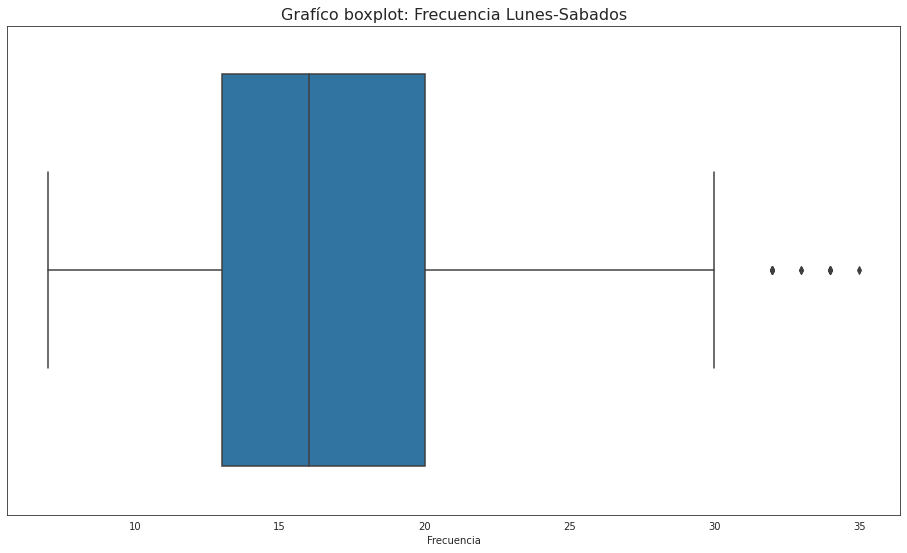

In [ ]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
ax = sns.boxplot(frecuencia2, ax=ax)
ax.set_title("Grafíco boxplot: Frecuencia Lunes-Sabados", fontsize=16)
ax.set_xlabel('Frecuencia')

print("Datos ensayados:", len(frecuencia2))
print("Promedio:", np.mean(frecuencia2))
print("Mediana:", np.median(frecuencia2))
print("Desvio:", np.std(frecuencia2))
plt.show()

En el gráfico de caja se puede observar los outliers, causantes de la variación de las medidas.

# Frecuencia los sábados

Datos ensayados: 43
Promedio: 27.441860465116278
Mediana: 27.0
Desvio: 4.627030418330738


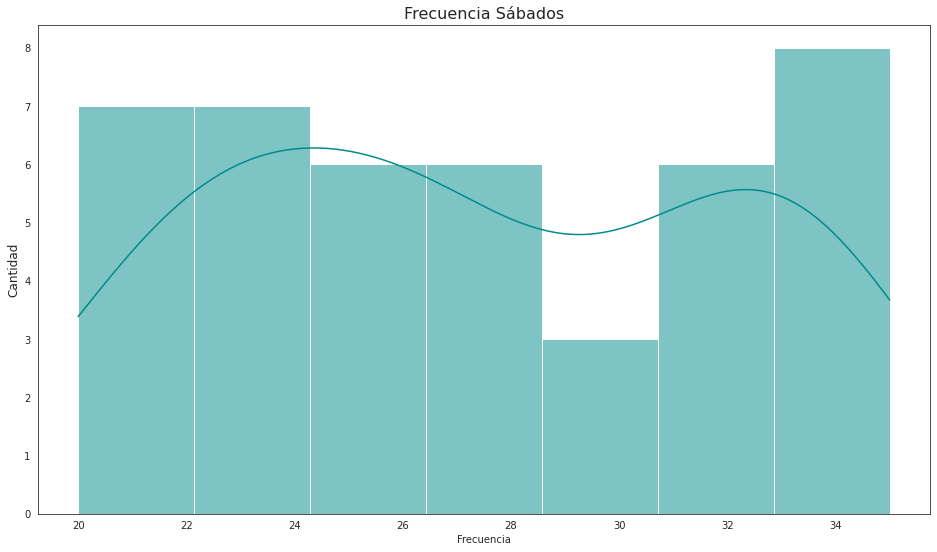

In [ ]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
    
sns.set_style("white")

ax = sns.histplot(x=sabado, kde=True, color="darkCyan", ax=ax)
ax.set_title("Frecuencia Sábados", fontsize=16)
ax.set_ylabel("Cantidad", fontsize=12)
ax.set_xlabel('Frecuencia')

print("Datos ensayados:", len(sabado))
print("Promedio:", np.mean(sabado))
print("Mediana:", np.median(sabado))
print("Desvio:", np.std(sabado))
plt.show()

La frecuencia de los sábado tiene un promedio de 27,44 aproximadamente y una media de 27.0, presentando un desvio estándar bajo de 4.62, lo que significa que los valores se encuentran agrupados cerca de la media.

En resumen, el colectivo se tarda en pasar los sábados entre 23 min a 31 min de espera. La espera es mayor con respecto a la semana.

